<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/Importance%20cx_theilri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
Clt = '/content/Classeurbb.xlsx'
data= pd.read_excel(Clt,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [3]:
data

,Source,CodeSite,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,Bennouna,Z01-S01-G01,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,Bennouna,Z01-S05-G01,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,Bennouna,Z01-S05-G02,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,Bennouna,Z01-S07-G01,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,Bennouna,Z01-S08-G01,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Trari,Trari_265,-5.283333,35.633333,1,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
297,Trari,Trari_267,-5.325286,35.685852,1,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.

In [4]:
del data["Source"]
del data["CodeSite"]
data.head()

,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.91142,23.79474,0,0.000000,0.0,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.18562,27.15794,1,0.000000,0.0,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.16718,27.15773,0,0.000000,0.0,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8


In [5]:
(data[data["Cx_theileri"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474            0  ...       5.4       5.5       4.9
1   -13.18837  27.13295            0  ...       4.3       3.7       3.8
2   -13.18837  27.13295            0  ...       4.3       3.7       3.8
4   -13.16718  27.15773            0  ...       4.2       3.6       3.8
5   -13.20156  27.16507            0  ...       4.6       3.8       3.9
..        ...       ...          ...  ...       ...       ...       ...
160  -6.00400  30.45600            0  ...       2.7       3.0       2.8
162  -6.23900  30.69500            0  ...       2.7       3.0       3.2
163  -6.91000  30.91300            0  ...       2.7       2.9       2.8
164  -6.86400  30.86600            0  ...       3.4       3.4       3.6
166  -5.00000  31.52220            0  ...       3.4       2.8       3.0

[114 rows x 226 columns]>

In [6]:
(data[data["Cx_theileri"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.185620  27.157940            1  ...       4.1       3.7       3.9
7   -13.207000  27.166000            1  ...       4.6       3.8       3.9
11  -13.214230  27.166700            1  ...       4.4       3.6       3.8
15  -10.227900  28.971600            1  ...       3.6       3.3       3.7
18  -10.585830  28.973590            1  ...       3.1       3.4       3.7
..         ...        ...          ...  ...       ...       ...       ...
296  -5.283333  35.633333            1  ...       3.9       3.4       3.8
297  -5.325286  35.685852            1  ...       4.0       3.9       4.3
298  -5.833954  35.759465            1  ...       3.5       3.8       3.9
299  -5.366667  35.766667            1  ...       4.0       4.0       4.2
300  -5.816667  35.783333            1  ...       3.6       3.8       4.0

[187 rows x 226 columns]>

In [7]:
Xt1 = data.loc[:, data.columns != 'Cx_theileri']
yt1 = data.Cx_theileri

In [8]:
Xt1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-5.283333,35.633333,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
297,-5.325286,35.685852,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,93,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
298,-5.833954,35.

In [9]:
yt1

0      0
1      0
2      0
3      1
4      0
      ..
296    1
297    1
298    1
299    1
300    1
Name: Cx_theileri, Length: 301, dtype: int64

In [11]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

RandomForestClassifier


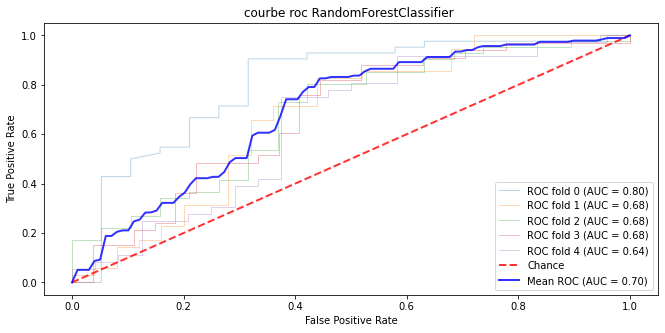

Accuracy: [0.83606557 0.68333333 0.71666667 0.68333333 0.7       ]
moy_accuracy: 0.72
precision: [0.86363636 0.69047619 0.78571429 0.66666667 0.69565217]
moy_precision: 0.74
sensibilité : [0.9047619  0.82857143 0.80487805 0.84848485 0.88888889]
moy_sensibilité: 0.86
spécificité : [0.68421053 0.48       0.52631579 0.48148148 0.41666667]
moy_spécificité: 0.52
MCC : [0.60833894 0.33197    0.33619409 0.35821815 0.3539192 ]
MCC: 0.40
MCC : [0.60833894 0.33197    0.33619409 0.35821815 0.3539192 ]
MCC: 0.40
balanced_accuracy : [0.79448622 0.65428571 0.66559692 0.66498316 0.65277778]
balanced_accuracy: 0.69
roc_auc : [0.80388471 0.67542857 0.68421053 0.67564534 0.64351852]
roc_auc: 0.70
cohen_kappa_scorec : [0.60645161 0.32142857 0.3359375  0.34027778 0.32835821]
cohen_kappa_scorec: 0.39


In [13]:

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, random_state=11),
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value


my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)


cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(Xt1, yt1)):
         clf.fit(Xt1.loc[train,], yt1.loc[train,])
         viz = plot_roc_curve(clf, Xt1.loc[test,], yt1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, Xt1, yt1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, Xt1, yt1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, Xt1, yt1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, Xt1, yt1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, Xt1, yt1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

In [14]:
features=Xt1.columns

In [16]:
features

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Coniferes', 'ZoneAride', 'ZonePel',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=225)

In [22]:
features[1]

'Y_lat'

In [44]:
v=5.76898793

In [50]:
classifiers = {
 "RandomForestClassifier":RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7, random_state=11)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    for i, (train, test) in enumerate(cv.split(Xt1, yt1)):
         model=clf.fit(Xt1.loc[train,], yt1.loc[train,])
         importance = model.feature_importances_
         lst=[]
         print(i)
         for i,v in enumerate(importance):
              print('Feature: %s, Score: %.5f' % (features[i],v))
              lst.append(v)
         print(lst)
    #evaluate model
    scores = cross_val_score(clf, Xt1, yt1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, Xt1, yt1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, Xt1, yt1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, Xt1, yt1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, Xt1, yt1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

RandomForestClassifier
0
Feature: X_long, Score: 0.00921
Feature: Y_lat, Score: 0.01555
Feature: Bovins, Score: 0.00403
Feature: Volaille, Score: 0.00820
Feature: Caprins, Score: 0.00429
Feature: Ovins, Score: 0.00439
Feature: Equides, Score: 0.00802
Feature: Coniferes, Score: 0.00020
Feature: ZoneAride, Score: 0.00257
Feature: ZonePel, Score: 0.00031
Feature: Lesfeuillus, Score: 0.00083
Feature: Caduc, Score: 0.00292
Feature: Autres, Score: 0.00190
Feature: Arbrisseau, Score: 0.00400
Feature: Pl_herb, Score: 0.00729
Feature: VegCul, Score: 0.00485
Feature: VegInond, Score: 0.00000
Feature: ZoneUrbaine, Score: 0.00257
Feature: Moy_IRM, Score: 0.00670
Feature: Amp1_IRM, Score: 0.00371
Feature: Amp2_IRM, Score: 0.00548
Feature: Amp3_IRM, Score: 0.00055
Feature: VarT_ann_IRM, Score: 0.00384
Feature: VarT_bi_IRM, Score: 0.00507
Feature: VarT_tri_IRM, Score: 0.00099
Feature: VarT_Cy_IRM, Score: 0.00143
Feature: Min_IRM, Score: 0.00835
Feature: Max_IRM, Score: 0.00619
Feature: Ph1_IRM, Score



*   CV1



In [54]:
lst1=[0.009207173939649163, 0.01555331870593978, 0.004031129384442381, 0.008197381286208899, 0.004286467650227015, 0.004385747993266926, 0.008020546598974377, 0.00019540551368594537, 0.002566721543254687, 0.0003089866422565096, 0.0008349083141206163, 0.0029160310396081335, 0.0018976157754358044, 0.003997094539613225, 0.00728856480319272, 0.00484688482781446, 0.0, 0.0025684200828475813, 0.006695075187380125, 0.0037059600015603576, 0.00547805176592965, 0.000545961401954695, 0.0038366546507644195, 0.00507448213871276, 0.0009871276597740422, 0.0014251443292970661, 0.00834972141287111, 0.006188329386629241, 0.003427344745746711, 0.003565857198098647, 0.00712209153387049, 0.000236808958440042, 0.004336908043907711, 0.002173255544163812, 0.006827888722051163, 0.010771820998340748, 0.0018425587246711744, 0.0028794476812850937, 0.0017981342522172595, 0.0016754151295072367, 0.006673293254435482, 0.0048890952111725824, 0.0038371241277035655, 0.002608425803370287, 0.00646266868375173, 0.006257194463373661, 0.006564566392719814, 0.009646363125782442, 0.014074548965263061, 0.003410900702934178, 0.0025816676532383486, 0.00044953804061257735, 0.0, 0.0012493530279029368, 0.010703978609283918, 0.003177201072229607, 0.006790201233719233, 0.006283299416208921, 0.007406413607832142, 0.004801325772061632, 0.007717847059434806, 0.0034449449863520653, 0.003933371038822724, 0.011310761176367616, 0.006234623062166297, 0.005007022811907371, 0.002440893678588174, 0.005137579489017135, 0.00580815461152488, 0.002778079462163357, 0.008060388636593075, 0.008612782979061685, 0.0036006006659293414, 0.004858218437702215, 0.005597244512431061, 0.002976776163303559, 0.005287541179243734, 0.00565578190426391, 0.006360801285049359, 0.0021040971012446386, 0.001581093653207502, 0.004103824535330555, 0.007212359798662964, 0.0029076810006884797, 0.006090543913589167, 0.004153072227629419, 0.004863631972913447, 0.0018199010087424482, 0.005554794708582793, 0.005712779050382747, 0.00061367662367798, 0.006844287785842582, 0.003993058901086924, 0.005350525417126234, 0.002990673982737661, 0.004437044679298042, 0.005438210490571209, 0.004619006802932816, 0.006373975430903111, 0.005611633483227193, 0.006314764647469316, 0.008212730912638718, 0.0035726094207406732, 0.004451368793248253, 0.003903195642237862, 0.001519609251019449, 0.0009402974305930804, 0.0020650449248669584, 0.007774930211636463, 0.003473184230486103, 0.002323162279720119, 0.00345014647187839, 0.0029260810427482182, 0.0038614025534015823, 0.0040991363517907595, 0.006468462818659735, 0.004531199869458571, 0.008735568261824875, 0.00523496057834692, 0.0035260214669540625, 0.00582293402915426, 0.0034076220298528974, 0.003975271438830235, 0.0021893491947968676, 0.0030923798489423332, 0.0038355203223604806, 0.0034784645292442675, 0.0037903304463734245, 0.002807712812403932, 0.003887232087716298, 0.0028678017556663573, 0.004131589692176057, 0.007454230179640473, 0.003563189080064789, 0.0010675699164247065, 0.0074562265192711415, 0.008081873462819876, 0.004880266997145127, 0.003757462852217691, 0.007839823801658255, 0.008749439066256578, 0.006412297011397414, 0.007108648117976438, 0.002410736413105997, 0.005258502589143079, 0.0027207282377097503, 0.002191026279811189, 0.0006620475016172209, 0.006240995496397259, 0.00429327649303835, 0.0027725533127249897, 0.003640204160955152, 0.0025977000813859844, 0.0027955119424781733, 0.005800166687556995, 0.003270576412234549, 0.003279941367065874, 0.0038491433943739117, 0.0017435552287340843, 0.0007404701914446365, 0.002288429057787691, 0.0042152510624677, 0.003355061837029994, 0.008278214373098813, 0.0029903344270362036, 0.007523683091484071, 0.0029183022764087095, 0.0044061703963371, 0.002866929205251635, 0.005983987083157404, 0.006211560544538298, 0.015213262695383114, 0.007271262538841642, 0.00535175119248776, 0.011565793766518015, 0.008047640853557986, 0.006977906102065541, 0.0026892545854832316, 0.0027625960106523466, 0.00599779075468402, 0.003181472591647721, 0.0024849576376380503, 0.003870637380442198, 0.003210208807005227, 0.003917302945260057, 0.0022734508849123064, 0.0022407809286619632, 0.0024766789213472628, 0.0019624787220688623, 0.0060574086701647815, 0.002179331882262998, 0.003575319012033924, 0.0056955304825261135, 0.005037203014077295, 0.003921527038967698, 0.0024883188999622096, 0.004318864220364369, 0.003026481385840064, 0.0030978527594072935, 0.004608112613924372, 0.008678452847517913, 0.0015583657180190677, 0.001521710110984244, 0.002953276954621333, 0.0028917629527096095, 0.0025266880266991056, 0.004335304439887663, 0.0024787934605353386, 0.005403043883995446, 0.0025353316093151496, 0.006673072729796427, 0.00236806359073962, 0.001963503996453894, 0.0027440875395739923, 0.0034424680988961102, 0.003673244053727065, 0.001310280549969308, 0.0020012824504211674, 0.0038913479708377664, 0.004479049668016325, 0.006837179330780292, 0.0034809486242900495, 0.00413880632268968, 0.0023445047039117334, 0.002809198591330268]


In [52]:
features

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Coniferes', 'ZoneAride', 'ZonePel',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=225)

In [55]:
CV1=pd.DataFrame(lst1,columns=['cv1'])

In [56]:
CV1

,cv1
0,0.009207
1,0.015553
2,0.004031
3,0.008197
4,0.004286
...,...
220,0.006837
221,0.003481
222,0.004139
223,0.002345


In [57]:
CV1.to_excel('CV1.xlsx')

In [58]:
lst2=[0.006997932181492427, 0.00937390675310818, 0.004280901856545685, 0.005647121896020374, 0.004013303102151078, 0.0034497545942275085, 0.006258068628753143, 0.0019001115016471853, 0.0009738197043797299, 0.0003555478945026547, 0.0, 0.0005953476811269452, 0.0021936471392682293, 0.006997422069778765, 0.003487512223923568, 0.0021264852735187736, 0.0007504790725097553, 0.001369496212059651, 0.005799234539417648, 0.0052210512629439435, 0.002876750940674631, 0.000806877363037987, 0.005198478674560148, 0.0008492733029585794, 0.0014093148479289838, 0.003216813316207487, 0.006067661915440776, 0.006819073612590396, 0.004223736269592211, 0.007246808689990232, 0.0062069892108517575, 0.00017398520212353707, 0.002814366106809013, 0.006256365711754298, 0.005211685490742313, 0.0030123000686554115, 0.00878465094158655, 0.0009318033529683236, 0.0007931128943360312, 0.005516634271999958, 0.009476718396111902, 0.004220468889740511, 0.004946760926673375, 0.004580194694479614, 0.0027516446760350688, 0.005389871911101716, 0.003594087976018889, 0.012351746710141484, 0.013487480189010826, 0.003613028326909494, 0.0019824843491247804, 0.000314988890433325, 0.0, 0.003641359436702682, 0.009368533103625738, 0.0064087683806630736, 0.011394906573066528, 0.00632044366154897, 0.006641080387555774, 0.010668413374354771, 0.006166904737965091, 0.0041519396578853646, 0.0027178135666800305, 0.009322267019084366, 0.005016542929473151, 0.0007016130363340692, 0.00015403829296798907, 0.0029277182348241295, 0.009973026676764233, 0.005104377404190773, 0.0075839983994299386, 0.004973244616403255, 0.007005042150217601, 0.0018457546039013222, 0.004168379235560949, 0.004534151172589265, 0.003280509192350486, 0.0052322932391370945, 0.011396623893267462, 0.0026654221021112745, 3.722950677855096e-05, 0.007348795435601575, 0.010645855263346432, 0.004407014479081851, 0.003527252321864879, 0.0029995834830042, 0.005446870001788521, 0.0026875089420118885, 0.005626387383551706, 0.004799337116090251, 0.0023827283067543443, 0.004587294871486155, 0.0072763801694273635, 0.008340431993992788, 0.006382038532234085, 0.004155134040255477, 0.005354189623184955, 0.0051757717896010694, 0.0057381324697874814, 0.01483154106629839, 0.009983956356761, 0.007598912549594348, 0.00499235856648458, 0.0020953675181439118, 0.0036001490025710263, 0.0024558548477074337, 0.0063037675358511465, 0.0034854782709287002, 0.002601045556066015, 0.001966740483313534, 0.0030314048305533593, 0.0012516690889034527, 0.003857375228766355, 0.0045299840039225185, 0.006459717121837045, 0.00474837204698532, 0.003875989958537846, 0.0018902427116031517, 0.0025364327464205867, 0.0030775845790519817, 0.010239942773078053, 0.0025279383920515162, 0.006287537501177386, 0.002776738932980154, 0.0019966388703373593, 0.003605187455718281, 0.006482787813060047, 0.004505773491654812, 0.001812658013549599, 0.0027823198121386585, 0.0015808684448132763, 0.005687658119507384, 0.003100199305706678, 0.0033044517300270136, 0.003139722282888655, 0.003960465424267858, 0.006053027024713569, 0.009694551016519365, 0.0035111459045413743, 0.006414429367593166, 0.004032949930211191, 0.00920208042623878, 0.008080466459608863, 0.007245795201526054, 0.0035863113908914616, 0.005398360486637474, 0.0041837426853083455, 0.0018415429709204168, 0.004401825980034696, 0.00983074046110074, 0.00393721782967093, 0.0024739619600552118, 0.006096588179778365, 0.005901540589180649, 0.008051178590246252, 0.00890553127335559, 0.00496613315060826, 0.0006736313394345444, 0.00338216014514272, 0.00013125598085113316, 0.0006359668839799995, 0.0027552500539590485, 0.005646195256638793, 0.006060433657832979, 0.004065945291048094, 0.005351534788545184, 0.0033291731649089085, 0.009069560953927884, 0.0055253201214793, 0.002596242078182241, 0.00606474167267452, 0.0055415719946127, 0.006693634652275504, 0.005180041653207396, 0.012053770074542773, 0.006300170200091246, 0.007309383066905766, 0.0023109659382978, 0.003917199980051642, 0.004771141074601855, 0.0039332796696941895, 0.0028696237948040524, 0.004688960288707973, 0.0042192105150456296, 0.004391237473040658, 0.0035134744171439, 0.004141036780832875, 0.001930305489562166, 0.0014829099431637749, 0.0024031018301341987, 0.0041787801779396595, 0.0008497496001816769, 0.006382918128773782, 0.0012305599374198613, 0.0016133754033989573, 0.004428978198358817, 0.00339429466488075, 0.001937621990886327, 0.0020891484381161474, 0.0040160914596488635, 0.0009415966240815566, 0.0009993270561796006, 0.002072856644289406, 0.0027148423165543416, 0.005446216793911635, 0.004364262864097818, 0.0015603252648468534, 0.0030242306341653714, 0.0030670784185906, 0.006155384891873251, 0.0018646482750469665, 0.0030661186516327044, 0.002110526402147806, 0.004299695192328584, 0.002475119598727978, 0.0015103952798805195, 0.003230316212299782, 0.003420879672388066, 0.0019021908937774503, 0.002596129407097908, 0.003755243093874488, 0.006562356357703813, 0.0017068125613072854, 0.002395075734668816, 0.005724067105138103]


In [59]:
CV2=pd.DataFrame(lst2,columns=['cv2'])

In [61]:
CV2.to_excel('CV2.xlsx')

In [ ]:
CV2

In [63]:
lst3=[0.013558080186993296, 0.013427705430194859, 0.004503705062232391, 0.006484829845087189, 0.005316189826949719, 0.002760623157816486, 0.008748568406336775, 0.0005817691018196741, 0.0005162356113793047, 0.0003140957369677769, 0.0002762951560656486, 0.0005911720150728626, 0.001244115188097694, 0.003991141454619509, 0.0062808091079265315, 0.0034125200055842354, 0.000914679838348996, 0.0034656171616952174, 0.004203973916630326, 0.0021132788812351705, 0.0039341125930446065, 0.0009237709761752118, 0.003061818616284288, 0.0010407316064506645, 0.0004156777069695526, 0.003083091500988384, 0.0030611262329161915, 0.0042088602548024205, 0.0045238831921949494, 0.004038341302046215, 0.0036639212102907138, 0.0, 0.006734308550700025, 0.005214443760923583, 0.005433488491696974, 0.005629179530019674, 0.002003480151480514, 0.001541795015904116, 0.0022016095695145694, 0.0030327178532914252, 0.01165864930758772, 0.010989856493611892, 0.0021931759658580345, 0.0026051436337151098, 0.005219169787317291, 0.00793430226354084, 0.005728119586161885, 0.007912068897879121, 0.010373607537110379, 0.004983575925136662, 0.0031163145644712707, 7.153739944874425e-05, 4.315253088819093e-05, 0.0005455939748027871, 0.0028064374771895827, 0.004410936646278881, 0.009409610442927912, 0.005265772280193771, 0.003377430252785236, 0.0077001577789774425, 0.0035637025259922343, 0.0038766983005216154, 0.004339154618085542, 0.005826906275903687, 0.003852927701086495, 0.002585930780925319, 0.0024625604719193243, 0.003410028804424854, 0.004354150533185104, 0.0040522105820604256, 0.00990563727687878, 0.003819904314800664, 0.009551806470311772, 0.004508266497817176, 0.005821492882489729, 0.0016388038635867354, 0.006025596380308209, 0.0059667858838699595, 0.0056276347352676595, 0.003833522642007219, 0.004261410513053251, 0.005331387121160697, 0.00656016669687665, 0.0031668757050758688, 0.0030545094036284965, 0.003690286635230788, 0.0025939719693951575, 0.0052967702188408804, 0.008189320456733035, 0.0037946826627484253, 0.0011486599479146294, 0.002184349308001375, 0.007504820732672466, 0.0037122745721534516, 0.0023414124638896213, 0.0038349297546005873, 0.003585923408133601, 0.003664880267131595, 0.004751027208693781, 0.007383263633644065, 0.008097838637731175, 0.004156526488947253, 0.004596083738501762, 0.003567071465503296, 0.006453145834162589, 0.001332876473950544, 0.0020489919128447447, 0.003364140527004832, 0.0033637936244999655, 0.00282589035248664, 0.0016140989345436107, 0.002057980949042174, 0.007004865786198083, 0.005058713901953408, 0.004121787195771583, 0.0023597230560499245, 0.0021284813601945753, 0.004462667650145694, 0.0007260381485316701, 0.00661055931990866, 0.006363472214953938, 0.0029933162957322765, 0.0032071565593331454, 0.00347032172429587, 0.0035045119018531196, 0.006493514294439231, 0.003105549549849173, 0.002901520834979729, 0.004738376659043563, 0.002749122256348541, 0.002668408141643748, 0.004963637020273355, 0.0018316254531442003, 0.002536100563617817, 0.0005413864677559049, 0.004353299393074873, 0.012082329834685712, 0.005967266363992885, 0.0026647292362754933, 0.006671207807643172, 0.004523718760210776, 0.010760680590461121, 0.005923976022456393, 0.004953371027484701, 0.004876022643904042, 0.006756867207059898, 0.0028975382988738023, 0.0007842081982442534, 0.009405209486578017, 0.001824916426727687, 0.002744243072886835, 0.0013785322322376948, 0.005805208128838093, 0.003555478125572962, 0.0038416349571303524, 0.006167651404888909, 0.0013433819648395766, 0.005924722519392876, 0.007617180132803306, 0.0005848147913516404, 0.001559767540746272, 0.0036173578114646614, 0.005600497547296812, 0.004802447221266778, 0.003802839338565904, 0.00993310587448223, 0.007379331166143379, 0.0069028731764803255, 0.007607207905390343, 0.006025702774911864, 0.008045192516001741, 0.015632111663598704, 0.009831148606678228, 0.004124243203774942, 0.0071253371071795454, 0.005631456778294848, 0.006659947645541073, 0.007532467758863367, 0.01122453888284121, 0.003889529680356712, 0.0021837701006422123, 0.006467244153734521, 0.006847410396901679, 0.006365642121198798, 0.0034876073468823854, 0.006379639980224225, 0.004239651429865437, 0.0033241762712337597, 0.004085647694393014, 0.0017073782866249664, 0.0035266958210528436, 0.002742687131216493, 0.0031077923541009463, 0.002337893841568648, 0.005232288837976805, 0.004991244642383596, 0.0033991274971107792, 0.0012392337455502164, 0.0027101206691328705, 0.004315287392175881, 0.005563055953648326, 0.0009223196933781433, 0.000800363014896961, 0.0016425856151433328, 0.006003666279480076, 0.004752822385307197, 0.00527076232821806, 0.005779905315684806, 0.006881349033982382, 0.00327221890166003, 0.0035903179477367, 0.0023165584249321986, 0.003120111300684716, 0.002406223221676399, 0.0016909469355460855, 0.0032426710162130707, 0.004057386667904209, 0.0023319960203150533, 0.005749105603492361, 0.009262427827359934, 0.007331917115828097, 0.003975807130980766, 0.0038743238160943803, 0.003131481928585264, 0.0021135285109001424]


In [64]:
CV3=pd.DataFrame(lst3,columns=['cv3'])

In [65]:
CV3.to_excel('CV3.xlsx')

In [66]:
CV3

,cv3
0,0.013558
1,0.013428
2,0.004504
3,0.006485
4,0.005316
...,...
220,0.007332
221,0.003976
222,0.003874
223,0.003131


In [67]:
lst4=[0.010810396310043342, 0.011135560825958134, 0.002832402486927, 0.005468466155131476, 0.0019104007384068726, 0.0026987776446390733, 0.00479419253248024, 0.0009447728976133677, 0.0009846362449319238, 0.0009907988125011321, 0.0, 0.0007605020513452333, 0.0, 0.004172018658257076, 0.0023738205444340894, 0.0031453649157704567, 0.0, 0.00046961689622467863, 0.0032700302590398895, 0.00396995931404084, 0.005363477882718758, 0.0032235067841188845, 0.0030115157653046554, 0.0026180725329328306, 0.0006592372126069718, 0.0023811506456766778, 0.003191456258141886, 0.0026105393954978335, 0.002854226930999912, 0.003931587154882316, 0.002461493175255841, 0.0, 0.004423068008474512, 0.0060675739751424405, 0.004591796357912637, 0.007024861986870009, 0.008426256519672798, 0.0007544052527488184, 0.0030955655729450484, 0.0027250877869880253, 0.014336706101022858, 0.004607555594992367, 0.005408185822972867, 0.00403384099526134, 0.004243711265721734, 0.0078051028693249935, 0.0040595035766114755, 0.012726813359125113, 0.007565734743504805, 0.0004279149861756336, 0.003118308531467885, 0.0009023164711778552, 0.0, 0.0015892789011901192, 0.006386250746591295, 0.005107930952132696, 0.007182822403955553, 0.006777000381826202, 0.007297860909386095, 0.008903971208303569, 0.011659117230417328, 0.006054794741076257, 0.0041249281381879445, 0.007388762289471248, 0.0061695768572281925, 0.001529558215919586, 0.0009755393521541279, 0.004438962345650902, 0.012577016941200938, 0.0064574323983201355, 0.004089476505531528, 0.005440623944637236, 0.006950551828344131, 0.003433650582057655, 0.00535050729900393, 0.0046788826260169515, 0.004399064091676572, 0.0040394057210196115, 0.004317324963611326, 0.0027872760126695776, 0.0014581559004133598, 0.001963690878410348, 0.007140917344590506, 0.003876724450302725, 0.003281326060637299, 0.004780571493602596, 0.005674357093460775, 0.001628442831763179, 0.009798215542841578, 0.003947775764648315, 0.0026587532657662482, 0.003845447806547378, 0.0062333616128523285, 0.008263521536796365, 0.008862344446966004, 0.007113203959573077, 0.008360780909990671, 0.0045839145489817625, 0.006008061472747104, 0.009241760772461912, 0.007340629471121858, 0.0037798832647933356, 0.0036901928707060005, 0.002420541062718386, 0.005750866741648206, 0.0025409264203240726, 0.0022121874441437474, 0.006373040575282154, 0.0034714852047520095, 0.0033687196834906096, 0.002375860172333104, 0.0023409912417309436, 0.003529389728822688, 0.005681833216609085, 0.0032693935417560526, 0.003831539446130059, 0.004159013209391718, 0.0031569448476388116, 0.0015697272070863038, 0.0031506256268211017, 0.00610879672780521, 0.0038980231700003025, 0.004059834362293952, 0.0054223431256643076, 0.0020574792445738487, 0.005266285566226291, 0.00622473587568845, 0.003500447348235111, 0.0021523624088283597, 0.0037553951556785893, 0.002449546095563462, 0.0029139475366752325, 0.002582054106098011, 0.002326900889335646, 0.0013501220845008608, 0.00955423012470877, 0.0034470262187624072, 0.004425766528772373, 0.00302255610900452, 0.0034292573655208343, 0.004050375113122393, 0.004285384773297936, 0.0070364224191513045, 0.0023959266753151324, 0.0008275095042007736, 0.0047783348606852075, 0.005874033075411169, 0.00033462617211726253, 0.005787395404869114, 0.004565162184159622, 0.004353982136276902, 0.0026087114589549774, 0.008241634444545488, 0.0035619855916982457, 0.0033252546641640416, 0.007230927626490536, 0.0014792190555494847, 0.004611538073468792, 0.002734317385223328, 0.0004276774939874077, 0.004512168939859103, 0.0029892091792036264, 0.006344715082708868, 0.0031458992651007224, 0.003778465403923673, 0.007455683829253788, 0.0067364820830451335, 0.0085212757873809, 0.006626096407937101, 0.0037184477281272162, 0.0065987744261098704, 0.022577598759181444, 0.009242025980058568, 0.0030546580719206544, 0.013931280827645729, 0.0110995573785426, 0.01098890905569931, 0.004578648495264636, 0.002770246100453529, 0.004057569375043441, 0.005666363304984112, 0.0036013000887272213, 0.0016579130981263263, 0.0024019496149140914, 0.0023570059914006093, 0.003424401053574799, 0.0014947000093699903, 0.0024094336574646187, 0.002041943586884159, 0.0065721281174951325, 0.004249544174563438, 0.005322162327635651, 0.0029827351687245944, 0.005393514961033876, 0.0029735703190717586, 0.006338509308404767, 0.002822007615086105, 0.0007594128297780021, 0.003062238955850071, 0.004729466439512302, 0.0019355880977558098, 0.0016404577295433631, 0.00638965172963124, 0.003875172697245516, 0.001673996052485287, 0.0068049414387871985, 0.004958836417996996, 0.00595410694973034, 0.004928724790010182, 0.003397874430703381, 0.003747613577435533, 0.003576629446453025, 0.002074836913122934, 0.005091192773477646, 0.0029162079790910635, 0.0022252808827026224, 0.0003191815386963038, 0.002550403883055557, 0.0033979643642805986, 0.008791951128479249, 0.005435096219527089, 0.005249826155520613, 0.005417209087987242, 0.0015670424713636673, 0.00440969522700125]


In [68]:
CV4=pd.DataFrame(lst4,columns=['cv4'])

In [70]:
CV4.to_excel('CV4.xlsx')

In [71]:
CV4

,cv4
0,0.010810
1,0.011136
2,0.002832
3,0.005468
4,0.001910
...,...
220,0.005435
221,0.005250
222,0.005417
223,0.001567


In [72]:
lst5=[0.013264238155911302, 0.009262202682897073, 0.006220332858636308, 0.00422369570223819, 0.003963442266173754, 0.002666176602429946, 0.008057115875872652, 0.0005270514283364077, 0.002184507463290712, 0.001033539791154929, 0.0003895200557067852, 0.0012317182122311636, 0.0017833451092554437, 0.004797814866300349, 0.002652030790419736, 0.005630472139576111, 0.00034208592952008655, 0.0018492556284765886, 0.007484073395022166, 0.0026067660778090786, 0.003083601384296672, 0.003538100080557931, 0.0036517965598560475, 0.0015104298430463335, 0.00037742865036429754, 0.0034664233549937086, 0.0025683816959359246, 0.00634792286016437, 0.0028345770447070775, 0.005258407522874491, 0.005389434950719726, 0.0, 0.004755574938458167, 0.0032939175474374373, 0.005360200442074677, 0.006767169068072123, 0.006979045490166951, 0.003094758667707789, 0.0032382191534756767, 0.0005408956410736559, 0.006813240205156961, 0.006026530941718141, 0.0025990938713167794, 0.0049725576911029655, 0.006910016253903466, 0.002047650194353291, 0.006524541214455241, 0.010276823825027023, 0.015379317488562536, 0.0071345281562526985, 0.003076535414841423, 0.000715087095613032, 0.0, 0.003105078174626061, 0.00928884584509606, 0.004473100449241108, 0.004954499480105517, 0.0033271442958355286, 0.00810969441362411, 0.012060553795590245, 0.016049098146571034, 0.004978909623658782, 0.002431041857513429, 0.009071012936317414, 0.009254423422503037, 0.002469432723287904, 0.00015073306230569707, 0.004527941733064689, 0.007168148005053675, 0.009364982603435495, 0.0047820576229847915, 0.00401391067085061, 0.00894491025271132, 0.0049668673881996354, 0.005564236066591182, 0.002495043170931349, 0.00293293653149315, 0.003945648533653012, 0.006110582266156739, 0.006051621828646369, 0.0010883051602547532, 0.0027501565270517648, 0.008031329667512887, 0.004439132844074886, 0.004852630206113287, 0.00885807884765528, 0.0020265524800716496, 0.00488550847537262, 0.005743284714346807, 0.005431058883747131, 0.003296462743014455, 0.0022997438112299746, 0.0032496710543195462, 0.004480723465549002, 0.006345668938984791, 0.004791179093097428, 0.004124312749331705, 0.0030496829290072355, 0.004665922678664403, 0.005108339517146007, 0.007203538128578586, 0.00507658522103762, 0.005056547573687493, 0.003444010641268344, 0.0023114412795695437, 0.0010338498312472794, 0.00022902920005460375, 0.006697639751410899, 0.005956286967071913, 0.0023452962049763733, 0.0029217574810479446, 0.001509655660784882, 0.003105599249482968, 0.004751032056693992, 0.004421875646757378, 0.007624987549052867, 0.0031551787708329494, 0.004196815014236935, 0.003474998003357266, 0.0030408198823376003, 0.003136944487218824, 0.003720134794535269, 0.004213023185651413, 0.003358797018777674, 0.0038936902884248365, 0.002829445081466872, 0.003144775880027518, 0.003958446237727864, 0.0033269955012890018, 0.0014067155553170979, 0.003336478248116154, 0.002884508455378403, 0.0021166928167051426, 0.0026103139624603167, 0.00417965704409521, 0.002911241526799258, 0.006017353578890205, 0.004354680192701637, 0.0037951604126503615, 0.0027613805364856215, 0.004693650691538655, 0.009138342894698314, 0.004963176259822563, 0.0037982378716395104, 0.004116535747510848, 0.0036060730242667024, 0.00825068892278613, 0.0015593725686809104, 0.005815615784694393, 0.0038406517905789595, 0.0021422835355612117, 0.004919074248627539, 0.004196870854802618, 0.006203036194772107, 0.006331734682352013, 0.004761494693341703, 0.0023841072453195046, 0.0013458245558384697, 0.006159568088731937, 0.0008098448709713466, 0.0017758920341922517, 0.004320111898593358, 0.0031698964117439993, 0.005903656707825083, 0.004168106209328221, 0.010740298632067238, 0.0048178339897536095, 0.005567511731190308, 0.004204739831024991, 0.005735185377537041, 0.003210295858981075, 0.018828133829640242, 0.022503157580509036, 0.005397784378794459, 0.007529907732046801, 0.0044468748029348176, 0.004791729996563828, 0.006712006477999668, 0.004136563109215792, 0.007740919849310202, 0.004292374644574093, 0.0022079441915136373, 0.0021249167050757423, 0.005871900616628862, 0.0026199699873939762, 0.0011521182764565171, 0.001750704953777943, 0.0052065491381577435, 0.004080718011895905, 0.006837742417960749, 0.0041888878436775615, 0.0037480968145953576, 0.004926381876908941, 0.004288959108910127, 0.004422516269166955, 0.0037694191610176935, 0.0048869006491690506, 0.0035374841307241884, 0.004888551666292488, 0.0013090664596973728, 0.002981242819853479, 0.0024978904844457743, 0.006200474433339642, 0.003854335867386297, 0.005106071430317229, 0.0012264040963616788, 0.003402740534526745, 0.0021370839534820634, 0.001187284878385649, 0.0019391559921550566, 0.005478715372437704, 0.0018826729602683511, 0.005277531929025853, 0.002856317143017295, 0.0024176425640605134, 0.0014706838323349561, 0.00031418106172230757, 0.0022852860111533288, 0.0019990969376257966, 0.006903187951911429, 0.003736022331449443, 0.004399710850147713, 0.0029816025637122, 0.0040564990982609635, 0.0022350001288910944]


In [73]:
CV5=pd.DataFrame(lst5,columns=['cv5'])

In [74]:
CV5.to_excel('CV5.xlsx')

In [75]:
CV5

,cv5
0,0.013264
1,0.009262
2,0.006220
3,0.004224
4,0.003963
...,...
220,0.003736
221,0.004400
222,0.002982
223,0.004056
